In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
merscope_dat = sc.read_h5ad('Tiled_input/baysor_tiled_seg.h5ad')
# merscope_dat = sc.read_h5ad('../04-spatial-analysis/NBL_TAM_clustering.h5ad')
merscope_dat.obs.describe()

,cluster,x,y,global_x,global_y,n_genes,n_genes_by_counts,total_counts
count,138131.000000,138131.000000,138131.000000,138131.000000,138131.000000,138131.000000,138131.000000,138131.000000
mean,2.205609,55539.672424,39295.329409,5998.288686,4243.898452,78.572652,78.572652,238.768585
std,1.086691,20722.359045,16396.371301,2238.016293,1770.809300,38.348643,38.348643,192.278595
min,1.000000,2066.033135,644.369328,223.131730,69.591935,20.000000,20.000000,20.000000
25%,1.000000,40112.955353,26531.662554,4332.202113,2865.421497,46.000000,46.000000,91.000000
50%,2.000000,54783.070052,39391.790541,5916.575575,4254.316261,75.000000,75.000000,175.000000
75%,3.000000,71363.975986,53057.350693,7707.314629,5730.197757,108.000000,108.000000,341.000000
max,4.000000,107477.382541,70466.623551,11607.565179,7610.400500,209.000000,209.000000,1469.000000


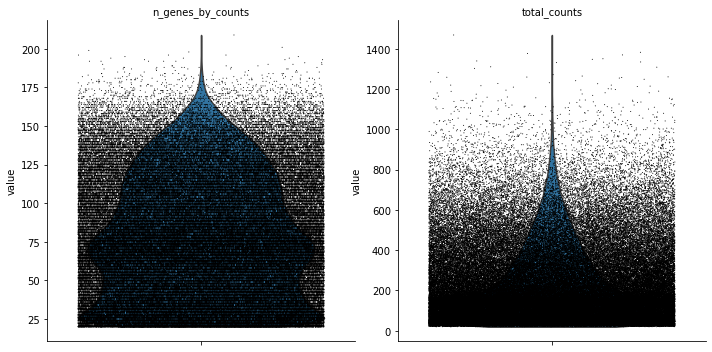

In [35]:
sc.pl.violin(merscope_dat, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

## Testing Shoviks gene panel

In [8]:
sb_genes = pd.read_csv("../Documents/shovik_MERFISH_Gene_Panel_FPKM.csv", index_col=1)
sb_genes.head()

,Unnamed: 0,H02,H03,H05,Average
Geneid,,,,,
DEFA3,1,268611,136467,204172,203083.333333
MPO,2,257361,221933,254663,244652.333333
ELANE,3,214725,128128,139475,160776.000000
CA1,4,191067,135287,223531,183295.000000
PRTN3,5,186398,114083,71766,124082.333333


In [9]:
genes = sb_genes.index.astype(str).intersection(merscope_dat.var_names)
genes

Index(['CXCL12', 'CD24', 'VIM', 'CSF3R', 'ITGAM', 'CD36', 'HLA-DRA', 'PTPRC',
       'CXCR4', 'TOP2A', 'MKI67', 'VCAN', 'PECAM1', 'HLA-DRB1', 'IL6R',
       'COL1A1', 'HIF1A', 'CD4', 'CD163', 'CDK6', 'FCGR3A', 'CD14', 'ITGAX',
       'CSF1R', 'THBS1', 'IL7R', 'TCF12', 'SPP1', 'ETS2', 'FN1', 'CD33', 'KIT',
       'CCR2', 'CD3E', 'MS4A1', 'CD79A', 'RGS5', 'FCRL1', 'CD8A', 'ISG15',
       'RORA', 'BANK1', 'PDGFRB', 'CDH5', 'LEF1', 'EBF1', 'CD69', 'ICAM1',
       'CD3D', 'NCAM2', 'PAX5', 'MCAM', 'COL15A1', 'NCAM1', 'ACTA2', 'DOCK4',
       'CD19', 'CNTN1', 'NES', 'GATA3', 'NLRP3', 'THY1', 'TSHZ2', 'IL7',
       'NLGN1', 'IL2RA', 'FOXP3', 'LAMA2', 'RORC', 'CD68', 'NEFL', 'IL3RA'],
      dtype='object')

In [10]:
merscope_dat.var.head()

,n_cells,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,mean,std
gene,,,,,,,
A2M,24619,24619,0.490672,86.018367,86398.0,0.765980,1.783586
ABCC2,490,490,0.002794,99.721719,492.0,0.012222,0.212181
ABCG2,2693,2693,0.017123,98.470590,3015.0,0.070620,0.519852
ABTB2,38111,38111,0.322885,78.355984,56854.0,1.045970,1.771825
ACLY,103987,103987,2.524849,40.943657,444578.0,3.551819,2.278701


In [12]:
m_dat = merscope_dat.var.loc[genes, "mean"]
sb_dat = sb_genes.loc[genes,"Average"]

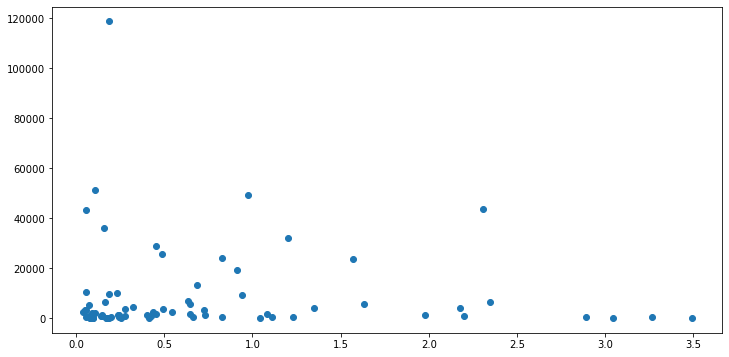

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(m_dat, sb_dat)
plt.savefig("outs/Shovik/exp_correlation.png", dpi=300)
plt.show()

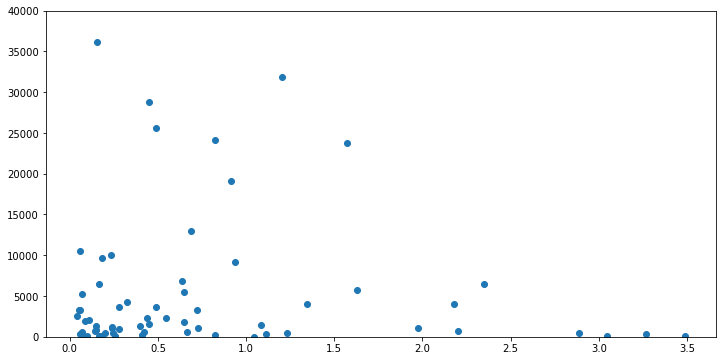

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(m_dat, sb_dat)
plt.ylim([0, 40000])
plt.savefig("outs/Shovik/exp_correlation_zoom.png", dpi=300)
plt.show()

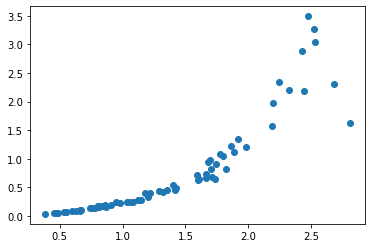

In [19]:
plt.scatter(merscope_dat.var.loc[genes, "std"], merscope_dat.var.loc[genes, "mean"])

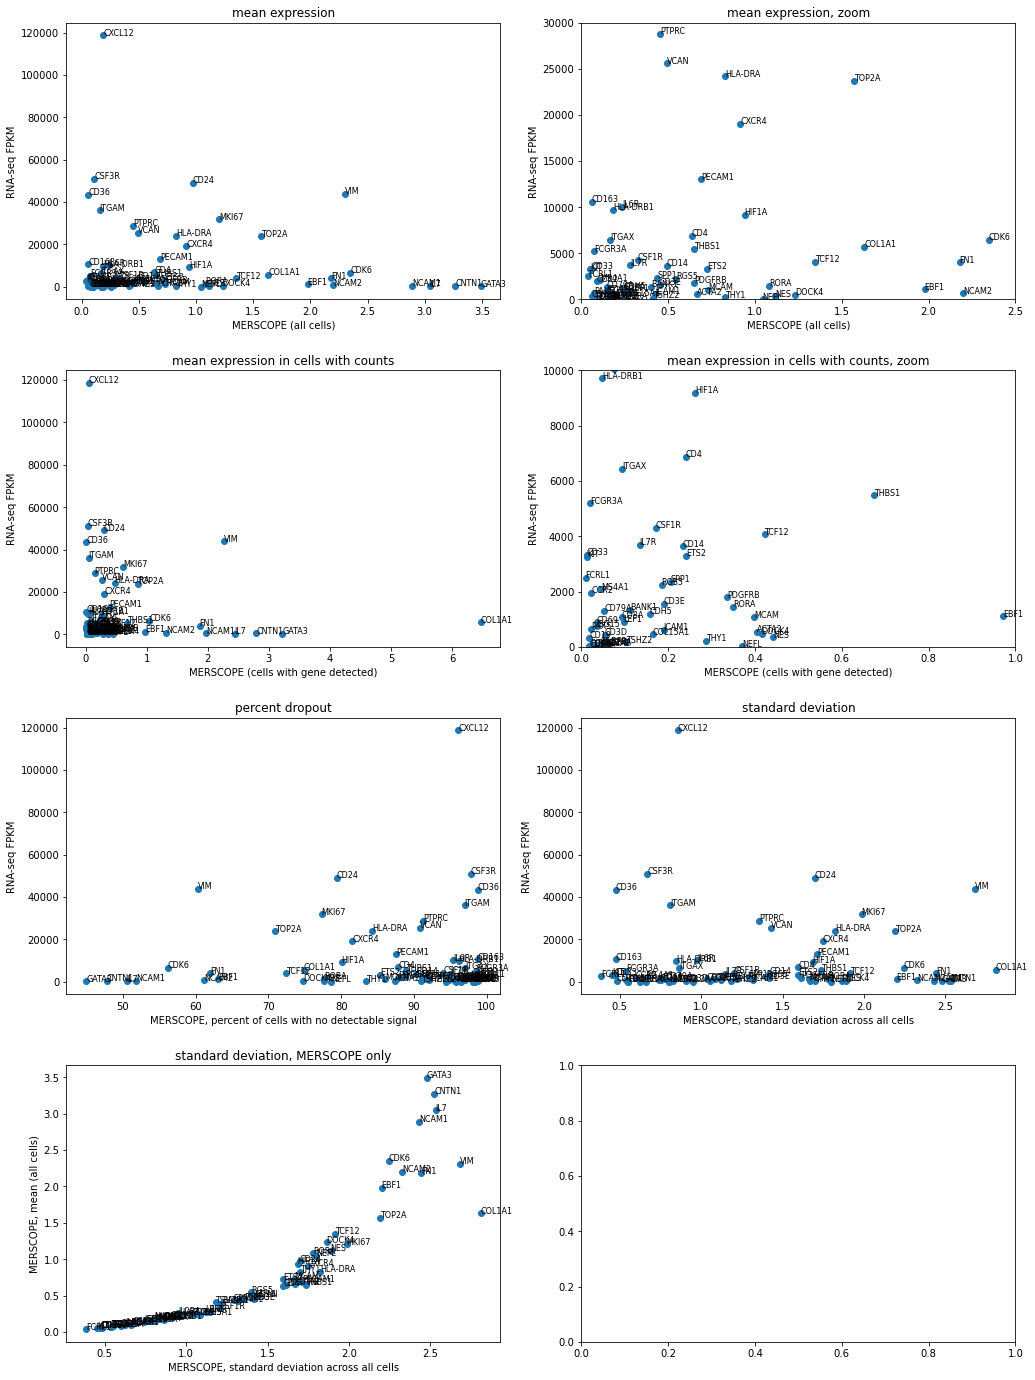

In [30]:
m_dat = merscope_dat.var.loc[genes, "pct_dropout_by_counts"]
# sb_dat = sb_genes.loc[genes,"Average"]
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.tight_layout(pad=5.0)
ax = ax.ravel()
ax[0].set_title('mean expression')
ax[0].scatter(merscope_dat.var.loc[genes, "mean"], sb_dat)
ax[0].set_xlabel('MERSCOPE (all cells)')
ax[0].set_ylabel('RNA-seq FPKM')
for i, txt in enumerate(genes):
    ax[0].annotate(txt, (merscope_dat.var.loc[genes, "mean"][i], sb_dat[i]), size=8)
ax[1].set_title('mean expression, zoom')
ax[1].scatter(merscope_dat.var.loc[genes, "mean"], sb_dat)
ax[1].set_xlabel('MERSCOPE (all cells)')
ax[1].set_ylabel('RNA-seq FPKM')
for i, txt in enumerate(genes):
    ax[1].annotate(txt, (merscope_dat.var.loc[genes, "mean"][i], sb_dat[i]), size=8)
ax[1].set_ylim([0, 30000])
ax[1].set_xlim([0, 2.5])
ax[2].set_title('mean expression in cells with counts')
ax[2].scatter(merscope_dat.var.loc[genes, "mean_counts"], sb_dat)
ax[2].set_xlabel('MERSCOPE (cells with gene detected)')
ax[2].set_ylabel('RNA-seq FPKM')
for i, txt in enumerate(genes):
    ax[2].annotate(txt, (merscope_dat.var.loc[genes, "mean_counts"][i], sb_dat[i]), size=8)
ax[3].set_title('mean expression in cells with counts, zoom')
ax[3].scatter(merscope_dat.var.loc[genes, "mean_counts"], sb_dat)
ax[3].set_xlabel('MERSCOPE (cells with gene detected)')
ax[3].set_ylabel('RNA-seq FPKM')
for i, txt in enumerate(genes):
    ax[3].annotate(txt, (merscope_dat.var.loc[genes, "mean_counts"][i], sb_dat[i]), size=8)
ax[3].set_ylim([0, 10000])
ax[3].set_xlim([0, 1])
ax[4].set_title('percent dropout')
ax[4].scatter(merscope_dat.var.loc[genes, "pct_dropout_by_counts"], sb_dat)
ax[4].set_xlabel('MERSCOPE, percent of cells with no detectable signal')
ax[4].set_ylabel('RNA-seq FPKM')
for i, txt in enumerate(genes):
    ax[4].annotate(txt, (merscope_dat.var.loc[genes, "pct_dropout_by_counts"][i], sb_dat[i]), size=8)
ax[5].set_title('standard deviation')
ax[5].scatter(merscope_dat.var.loc[genes, "std"], sb_dat)
ax[5].set_xlabel('MERSCOPE, standard deviation across all cells')
ax[5].set_ylabel('RNA-seq FPKM')
for i, txt in enumerate(genes):
    ax[5].annotate(txt, (merscope_dat.var.loc[genes, "std"][i], sb_dat[i]), size=8)
ax[6].set_title('standard deviation, MERSCOPE only')
ax[6].scatter(merscope_dat.var.loc[genes, "std"], merscope_dat.var.loc[genes, "mean"])
ax[6].set_xlabel('MERSCOPE, standard deviation across all cells')
ax[6].set_ylabel('MERSCOPE, mean (all cells)')
for i, txt in enumerate(genes):
    ax[6].annotate(txt, (merscope_dat.var.loc[genes, "std"][i], merscope_dat.var.loc[genes, "mean"][i]), size=8)
plt.savefig("outs/Shovik/FPKM-MERSCOPE_stat_plots.pdf", dpi=300)
plt.show()

## Need to process the cellranger output

In [4]:
merscope_dat.X = merscope_dat.raw.X

In [153]:
print(m_dat.X[:,1].sum())
print(merscope_dat.X[:,1].sum())

1688.215
-0.001083374


In [5]:
sc.pp.normalize_total(merscope_dat, target_sum=1e4)

In [6]:
sc.pp.log1p(merscope_dat)

In [7]:
dat = sc.read_10x_mtx('/mnt/isilon/tan_lab/uzuny/projects/cptca/real_samples/data/scrna/cellranger_counts/htan_std/NB/NB_7767_3458_REG2/outs/filtered_feature_bc_matrix')

In [6]:
dat

AnnData object with n_obs × n_vars = 7718 × 20586
    var: 'gene_ids', 'feature_types'

In [8]:
sc.pp.filter_cells(dat, min_genes=200)
sc.pp.filter_genes(dat, min_cells=3)

In [12]:
dat.var['mt'] = dat.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(dat, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'feature_types' as categorical


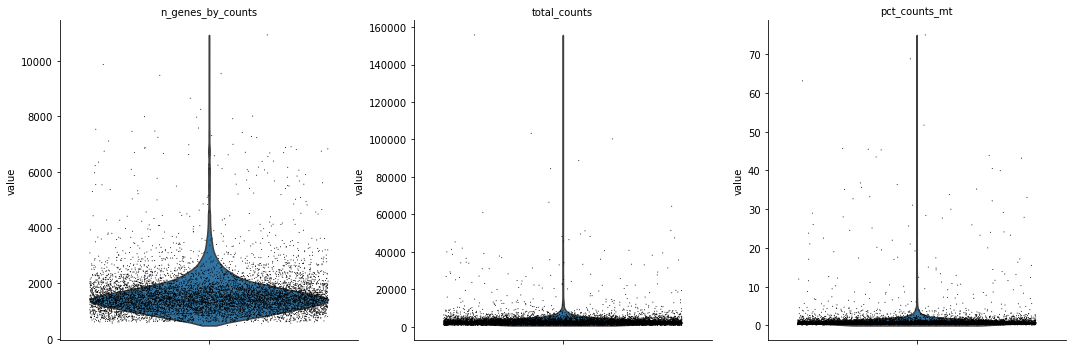

In [119]:
sc.pl.violin(dat, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [13]:
dat = dat[dat.obs.total_counts < 20000, :]
dat = dat[dat.obs.pct_counts_mt < 10, :]

In [ ]:
# sc.pp.normalize_total(dat, target_sum=1e4)

In [ ]:
# sc.pp.log1p(dat)

In [132]:
# sc.pp.scale(dat, max_value=10)

## Testing correlation

In [10]:
# which genes are in common?
g_idx = pd.Series(map(lambda x: np.where(x == dat.var_names)[0], merscope_dat.var_names))

In [11]:
keep_idx = np.where(list(map(lambda x: len(x) > 0, g_idx)))

g_idx = g_idx.iloc[keep_idx[0]]
g_idx = g_idx.apply(lambda x: x[0])

In [15]:
dat = dat[:, g_idx.values]
dat

View of AnnData object with n_obs × n_vars = 7561 × 393
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [16]:
sc.pp.normalize_total(dat, target_sum=1e4)
sc.pp.log1p(dat)

/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [17]:
print(merscope_dat.var_names[397])
print(dat.var_names[2524])


ZNF804A


IndexError: index 2524 is out of bounds for axis 0 with size 393

In [171]:
merscope_dat.X.shape

(138131, 398)

In [201]:
dat.X.shape

(7718, 393)

In [18]:
# row sums of merscope
# m_sum = np.apply_along_axis(np.sum, 1, merscope_dat.X[g_idx.index, :])
# m_sum = merscope_dat.X[ :, g_idx.index].sum(0)
m_sum = merscope_dat.X[ :, g_idx.index].mean(0)
m_sum.shape

(393,)

In [19]:
# row sums of snSeq
# seq_sum = np.apply_along_axis(np.sum, 0, dat.X[:, g_idx])
seq_sum = dat.X.mean(0)
seq_sum.shape

(1, 393)

In [187]:
# dat.X[:, g_idx.values].shape

(7718, 393)

In [188]:
# print(m_sum[0:10])
# print(np.array(seq_sum).shape)
# print(np.array(seq_sum)[0,:][0:10])

[0.8220141  0.01545883 0.08728932 1.2238703  3.5424654  1.646643
 0.72470546 0.25311267 0.02205401 1.3621043 ]
(1, 393)
[0.6530364  0.01995338 0.0413319  0.45050833 0.48173806 0.33869022
 0.2618542  1.6356899  0.2303695  4.5951667 ]


In [20]:
seq_sum2 = np.array(seq_sum)[0,:]

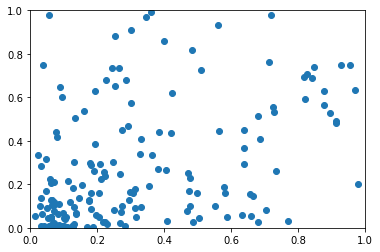

In [23]:
plt.scatter(m_sum, seq_sum2)
plt.xlim([0,1])
plt.ylim([0,1])
plt.savefig('snSeq-MERSCOPE_corr_zoom.png')

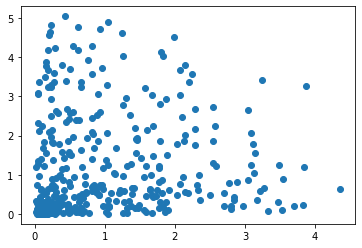

In [25]:
plt.scatter(m_sum, seq_sum2)

In [29]:
outliers = set(np.where(m_sum < 0.5)[0]).intersection(np.where(seq_sum2 > 3)[0])

In [31]:
dat.var_names[list(outliers)]

Index(['PARD3', 'AKAP13', 'FOSB', 'ARHGAP10', 'PLXDC2', 'BNC2', 'IMMP2L',
       'RFX2', 'LAMA2', 'SIPA1L1', 'LMNA', 'SLC2A3', 'LRMDA', 'CREB5',
       'CRISPLD2', 'NAMPT', 'NFIA', 'EGFR', 'NR4A3', 'EMP1'],
      dtype='object')

In [32]:
low_genes = set(np.where(m_sum < 0.5)[0]).intersection(np.where(seq_sum2 < 0.5)[0])

In [33]:
dat.var_names[list(low_genes)]

Index(['ABCC2', 'ABCG2', 'ADCYAP1', 'AGBL4', 'ALB', 'ARHGAP36', 'BANK1',
       'BRINP3', 'BRIP1', 'CACNB2',
       ...
       'SLC35F3', 'SLC39A14', 'SNAI2', 'SPOCK3', 'SV2C', 'SYN2', 'TBX21',
       'THEMIS', 'TMEM163', 'UNC5D'],
      dtype='object', length=112)

In [34]:
high_genes = set(np.where(m_sum > 3)[0]).intersection(np.where(seq_sum2 < 1)[0])

In [35]:
dat.var_names[list(high_genes)]

Index(['PRPH', 'STMN1', 'ACLY', 'KRT19', 'L1CAM', 'CHGB', 'PHOX2B', 'GAP43',
       'GATA3', 'TUBB', 'ENO2'],
      dtype='object')

In [36]:
"TUBB" in merscope_dat.var_names

True